Import the neccesary libraries

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2024-01-31'
end = '2025-01-31'

# Tickers of assets
assets = asset_classes = pd.read_csv("assets_classesSA40.csv").sort_values(by = ["Assets"])

# # benchweights
# weights = pd.read_csv("benchweights_STX40.csv")

assets = list(asset_classes["Assets"])

# market_index = ['^J203.JO']

all_assets = assets #+ market_index
all_assets.sort()

# Downloading data
data = yf.download(all_assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = all_assets

[*********************100%***********************]  42 of 42 completed


In [40]:

# benchweights
weights = pd.read_csv("benchweights_STX40.csv").set_index("Assets")

# remove the industry column
weights = weights.drop(columns = "Industry")

# benchweights = [{
#     'ABG.JO': 0.0283,
#     'AGL.JO': 0.0389,
#     'ANG.JO': 0.0333,
#     'ANH.JO': 0.0133,
#     'APN.JO': 0.0122,
#     'BHG.JO': 0.0154,
#     'BID.JO': 0.0289,
#     'BTI.JO': 0.033,
#     'BVT.JO': 0.0161,
#     'CFR.JO': 0.0349,
#     'CLS.JO': 0.0153,
#     'CPI.JO': 0.0493,
#     'DSY.JO': 0.0183,
#     'EXX.JO': 0.0078,
#     'FSR.JO': 0.0702,
#     'GFI.JO': 0.0555,
#     'GLN.JO': 0.0087,
#     'GRT.JO': 0.0074,
#     'HAR.JO': 0.0224,
#     'IMP.JO': 0.0146,
#     'INL.JO': 0.0054,
#     'INP.JO': 0.0081,
#     'MNP.JO': 0.0094,
#     'MRP.JO': 0.0116,
#     'MTN.JO': 0.0381,
#     'NED.JO': 0.0228,
#     'NPN.JO': 0.1227,
#     'NRP.JO': 0.0152,
#     'OMU.JO': 0.0099,
#     'OUT.JO': 0.0101,
#     'PPH.JO': 0.0131,
#     'PRX.JO': 0.0402,
#     'REM.JO': 0.0134,
#     'RNI.JO': 0.0114,
#     'SBK.JO': 0.0539,
#     'SHP.JO': 0.0249,
#     'SLM.JO': 0.0249,
#     'SOL.JO': 0.0087,
#     'SSW.JO': 0.0095,
#     'VOD.JO': 0.0132,
#     'WHL.JO': 0.0097
# }]

# benchweights = pd.DataFrame(benchweights)

In [41]:
# Calculating returns

Y = data[all_assets].pct_change().dropna()
# weights = pd.

display(Y.head())

,ABG.JO,AGL.JO,ANG.JO,ANH.JO,APN.JO,BHG.JO,BID.JO,BTI.JO,BVT.JO,CFR.JO,...,REM.JO,RNI.JO,SBK.JO,SHP.JO,SLM.JO,SOL.JO,SSW.JO,VOD.JO,WHL.JO,^J203.JO
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-01 00:00:00+00:00,-0.8364%,-1.9973%,1.4496%,-1.0994%,-0.0412%,-1.2942%,4.4040%,-0.9305%,-1.5031%,-1.0221%,...,-0.4249%,-1.0038%,-0.7259%,0.4494%,0.9800%,-0.8099%,-0.1748%,2.0780%,0.3460%,-0.1152%
2024-02-02 00:00:00+00:00,0.2524%,-1.3293%,0.6094%,1.4871%,-1.2887%,0.2706%,-0.7192%,2.2731%,-1.0818%,0.6810%,...,-0.6559%,-2.1333%,1.5331%,-1.6941%,-1.2200%,-2.0874%,-1.1384%,-1.6160%,-1.4079%,-0.1182%
2024-02-05 00:00:00+00:00,0.0000%,-1.5096%,-1.6956%,0.5004%,1.8747%,-1.3582%,0.9411%,0.2725%,-0.6944%,-0.1964%,...,0.0000%,1.7003%,-0.4818%,0.5893%,0.5754%,-2.4705%,-3.3215%,0.2240%,0.2040%,-0.4679%
2024-02-06 00:00:00+00:00,0.8413%,1.2332%,0.0177%,-0.7693%,0.7842%,0.2860%,-0.5556%,-0.9053%,-1.2311%,-0.2842%,...,-0.4808%,-0.2682%,0.1348%,-0.4376%,0.2233%,1.2923%,1.6949%,1.6282%,0.2327%,0.7086%
2024-02-07 00:00:00+00:00,0.1218%,-3.0717%,0.4687%,4.6062%,-1.0680%,0.1109%,-1.9365%,-0.7337%,-1.8060%,0.5833%,...,-1.2947%,-0.0195%,-1.8292%,0.1527%,1.6430%,-1.7518%,-4.1892%,-0.1047%,0.1596%,-0.3287%


In [42]:
import riskfolio as rp

# Building the portfolio object

port = rp.Portfolio(returns=Y[assets])
# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Create Turnover Constraints

port.allowTO = True # Allows to use Turnover Constraints
port.turnover = 0.05 # Maximum deviation in absolute value respect to benchmark weights
# By default benchweights is the equally weighted portfolio,
# if you want to use a different benchmark weights, you must
# specify a weights dataframe with assets names in columns
port.benchweights = weights # Use a dataframe

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,ABG.JO,AGL.JO,ANG.JO,ANH.JO,APN.JO,BHG.JO,BID.JO,BTI.JO,BVT.JO,CFR.JO,...,PRX.JO,REM.JO,RNI.JO,SBK.JO,SHP.JO,SLM.JO,SOL.JO,SSW.JO,VOD.JO,WHL.JO
weights,5.7854%,0.1575%,8.3300%,0.0000%,0.0000%,0.0000%,3.5306%,8.3000%,0.0000%,8.4900%,...,9.0200%,0.0000%,0.0000%,0.3900%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


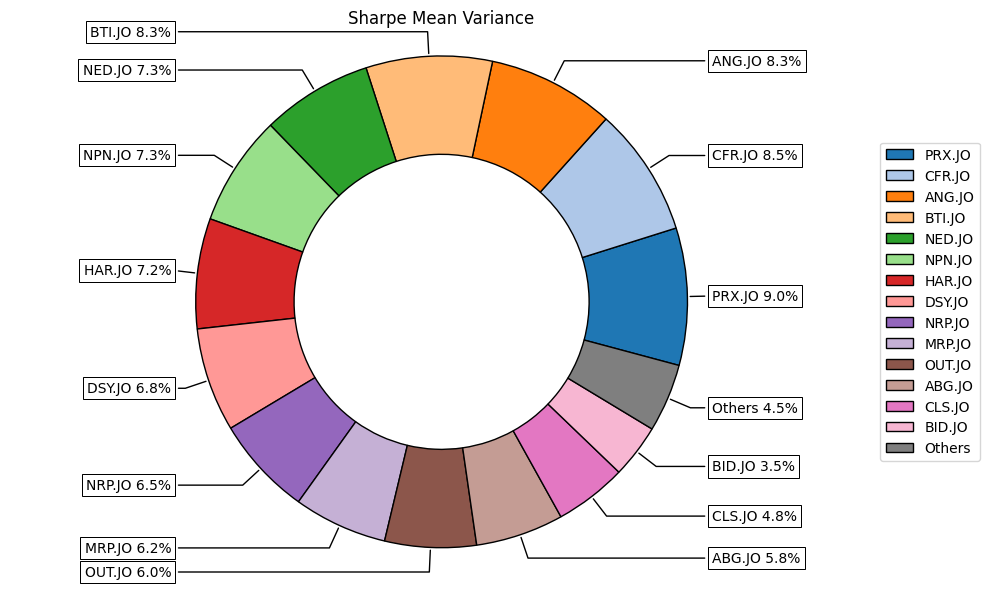

In [43]:
ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                  height=6, width=10, ax=None)

In [44]:
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,ABG.JO,AGL.JO,ANG.JO,ANH.JO,APN.JO,BHG.JO,BID.JO,BTI.JO,BVT.JO,CFR.JO,...,PRX.JO,REM.JO,RNI.JO,SBK.JO,SHP.JO,SLM.JO,SOL.JO,SSW.JO,VOD.JO,WHL.JO
0,0.0000%,0.1196%,5.6466%,6.3300%,1.3910%,4.3210%,7.8900%,8.3000%,0.0000%,6.3780%,...,0.0000%,0.0000%,5.3699%,3.9580%,1.3925%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
1,7.8300%,0.0000%,8.3300%,0.0000%,0.0000%,0.0000%,0.0000%,8.3000%,0.0000%,8.4900%,...,0.0001%,0.0000%,0.0000%,0.3900%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
2,7.8300%,0.0000%,8.3300%,0.0000%,0.0000%,0.0000%,0.0000%,8.3000%,0.0000%,8.4900%,...,0.0000%,0.0000%,0.0000%,0.3900%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
3,7.8300%,0.0000%,8.3300%,0.0000%,0.0000%,0.0000%,0.0000%,8.3000%,0.0000%,8.4900%,...,0.0000%,0.0000%,0.0000%,0.3900%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
4,7.8300%,0.0000%,8.3300%,0.0000%,0.0000%,0.0000%,0.0000%,8.3000%,0.0000%,8.4900%,...,0.0000%,0.0000%,0.0000%,0.3900%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


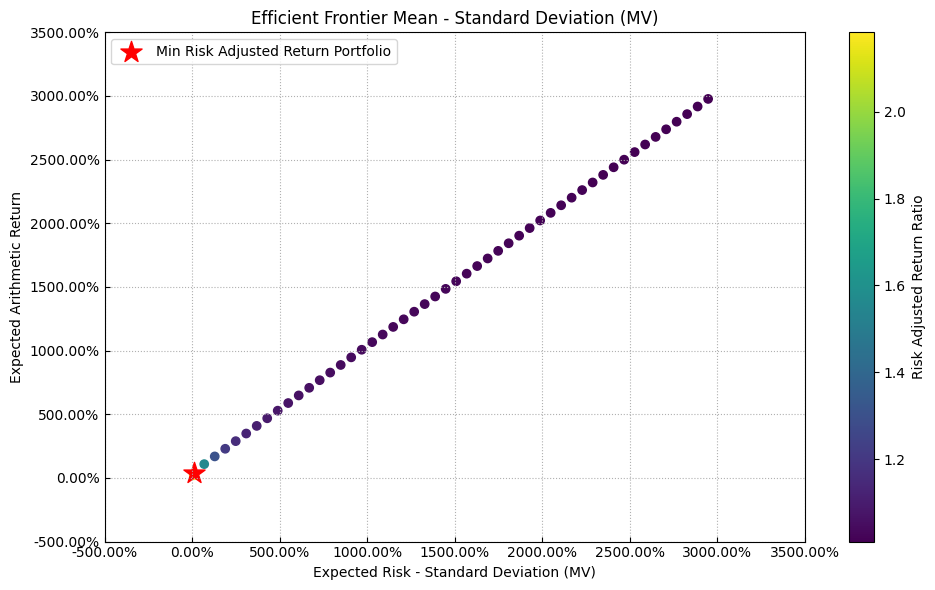

In [45]:
# Plotting the efficient frontier

label = 'Min Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)

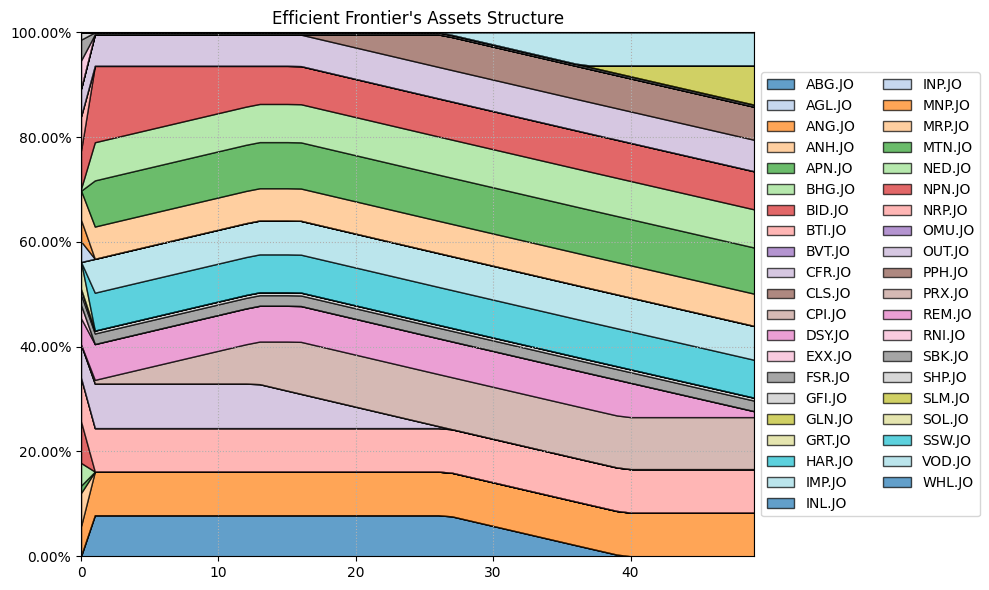

In [46]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)

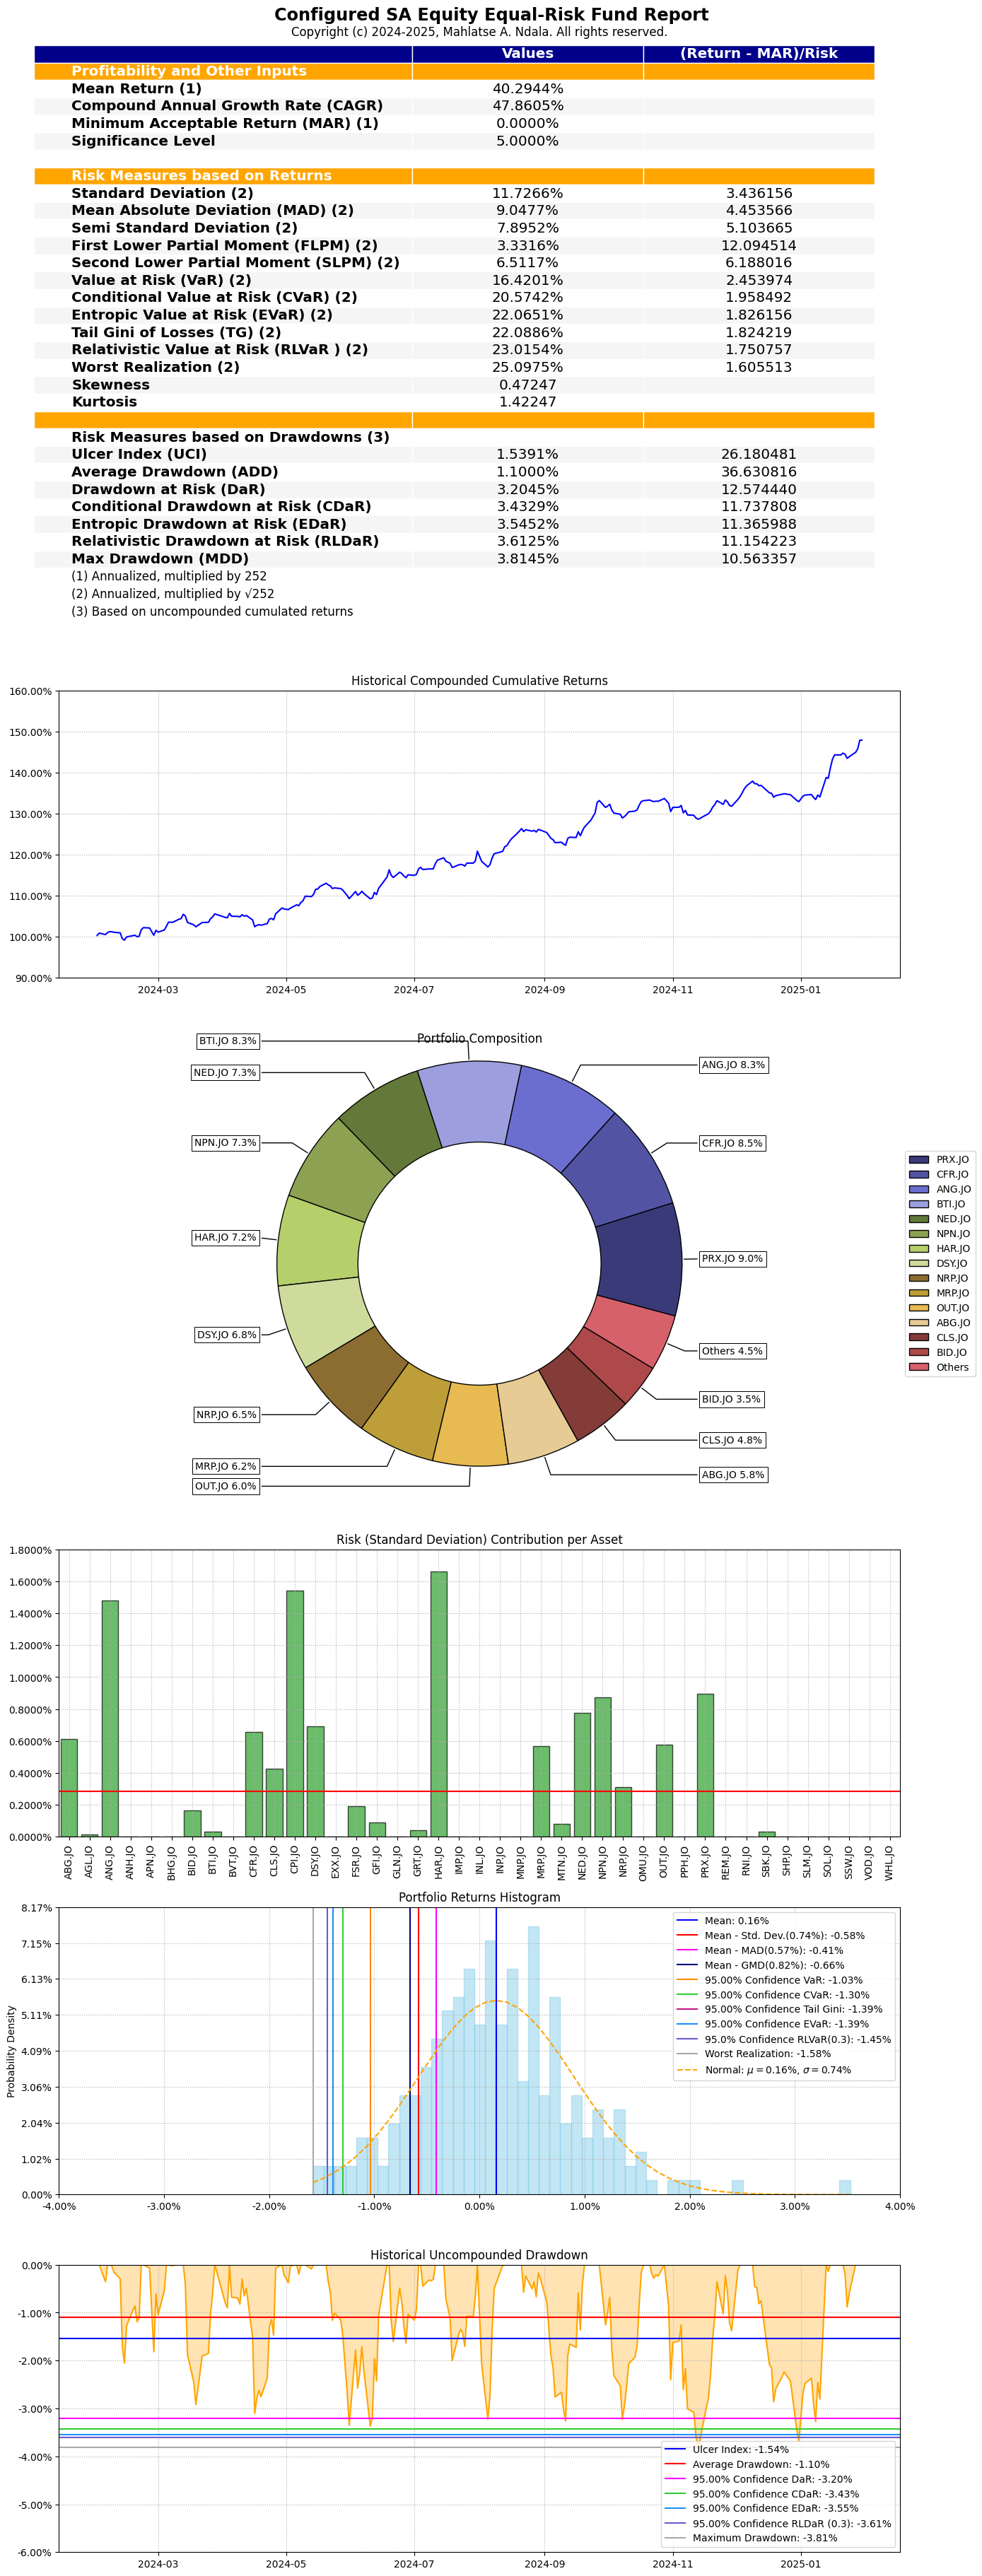

In [47]:
import matplotlib.pyplot as plt

ax = rp.jupyter_report(returns, w, rm=rm, t_factor = 252, days_per_year = 365)
plt.show()

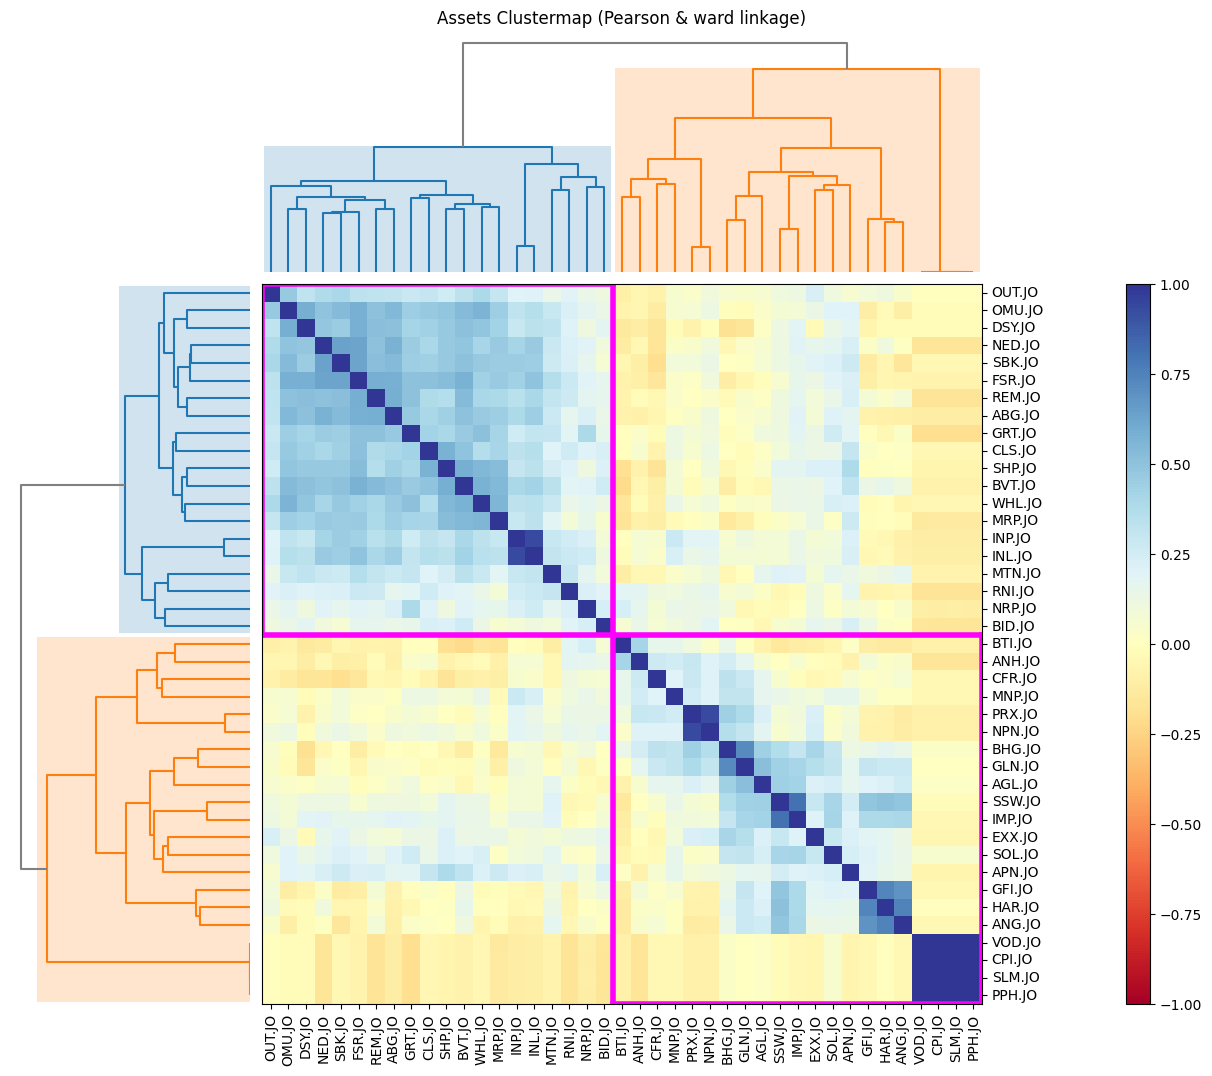

In [48]:
ax = rp.plot_clusters(returns,
                      codependence = "pearson",
                      linkage = "ward",
                      k = None,
                      max_k = 10,
                      leaf_order = True,
                      dendrogram = True,
                      ax = None)

In [49]:
# Building the portfolio object for the min risk in comparison

port = rp.Portfolio(returns=Y[assets])
# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Create Tracking Error Constraints

port.kindbench = True # True if you have benchmark weights, False if you have an index
port.benchindex = weights # Index Returns
port.allowTE = True # Allows to use Tracking Error Constraints
port.TE = 0.001 # Maximum Tracking Error respect to benchmark returns

# Estimate optimal portfolio:

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = "MinRisk" # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w)

,weights
ABG.JO,2.4666%
AGL.JO,2.4488%
ANG.JO,2.4604%
ANH.JO,2.3557%
APN.JO,2.4049%
BHG.JO,2.3997%
BID.JO,2.4494%
BTI.JO,2.5424%
BVT.JO,2.4384%
CFR.JO,2.4695%


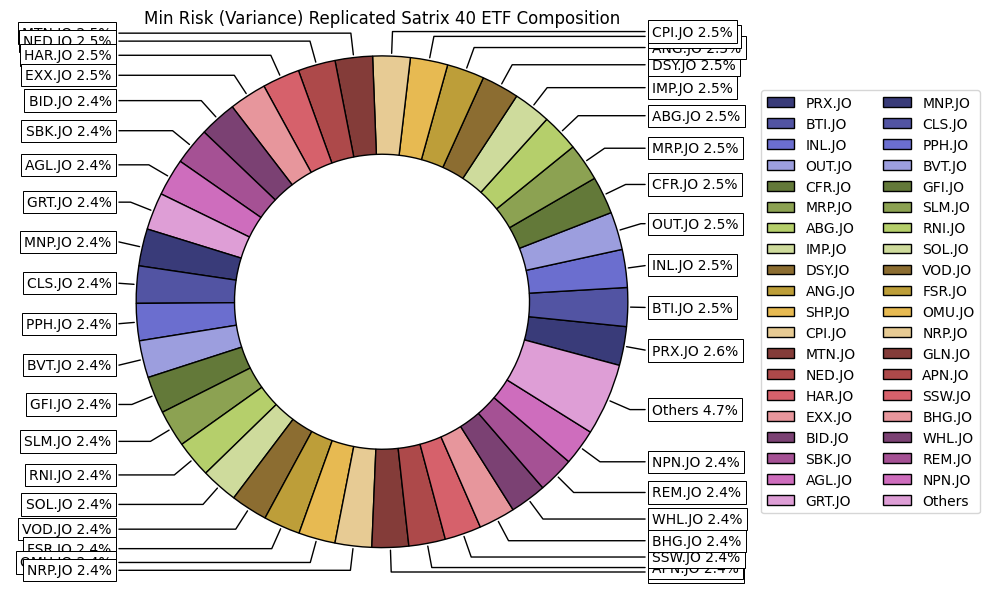

In [31]:
# Plotting the composition of the min risk portfolio

ax = rp.plot_pie(w=w, title='Min Risk (Variance) Replicated Satrix 40 ETF Composition', others=0.05, nrow=25, cmap = "tab20b",
                 height=6, width=10, ax=None)

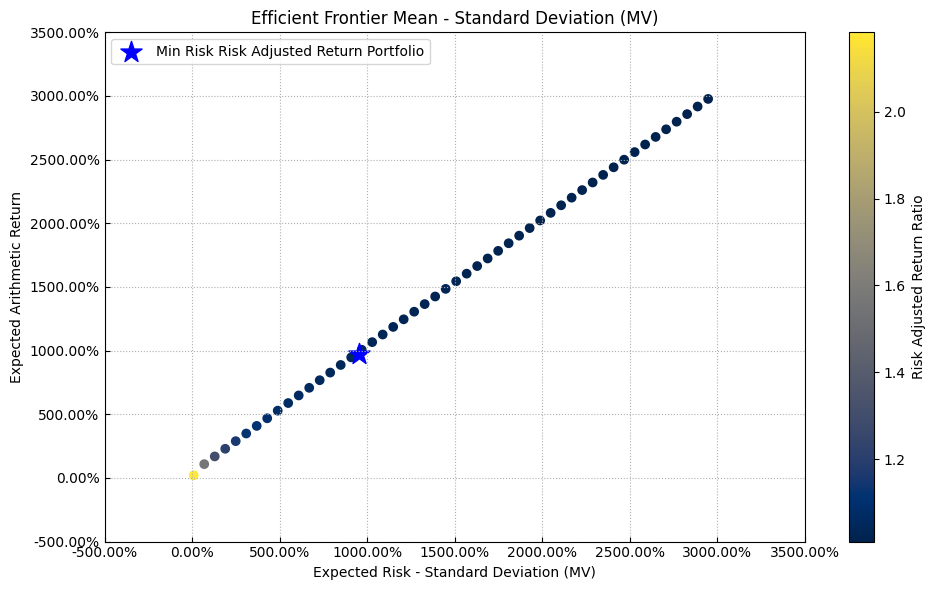

In [32]:
# Plotting the efficient frontier

label = 'Min Risk Risk Adjusted Return Portfolio' # Title of point
mu = port.mu # Expected returns
cov = port.cov # Covariance matrix
returns = port.returns # Returns of the assets

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='cividis', w=w, label=label,
                      marker='*', s=16, c='b', height=6, width=10, ax=None)

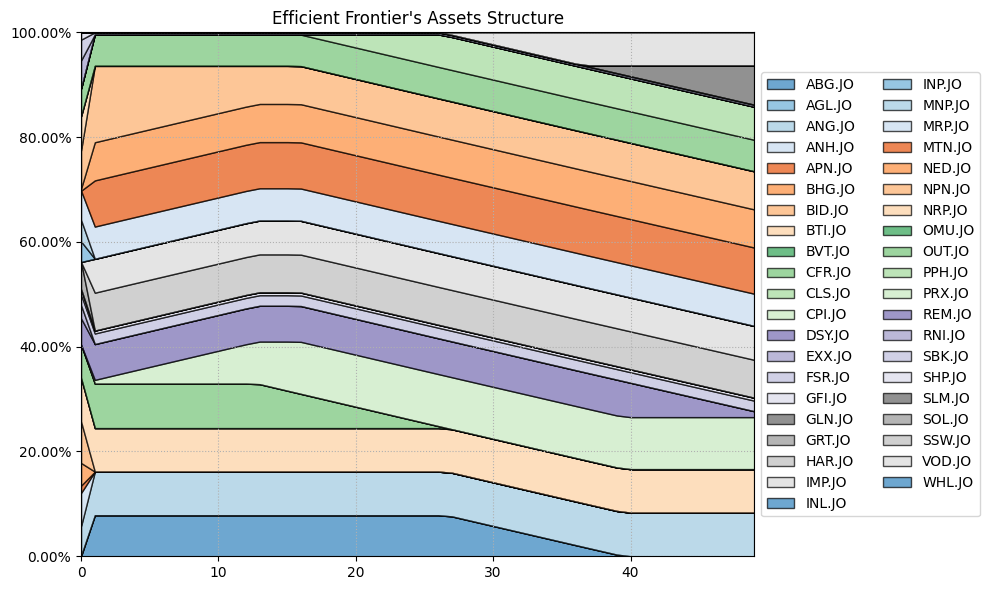

In [33]:
# Plotting efficient frontier composition

ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20c", height=6, width=10, ax=None)

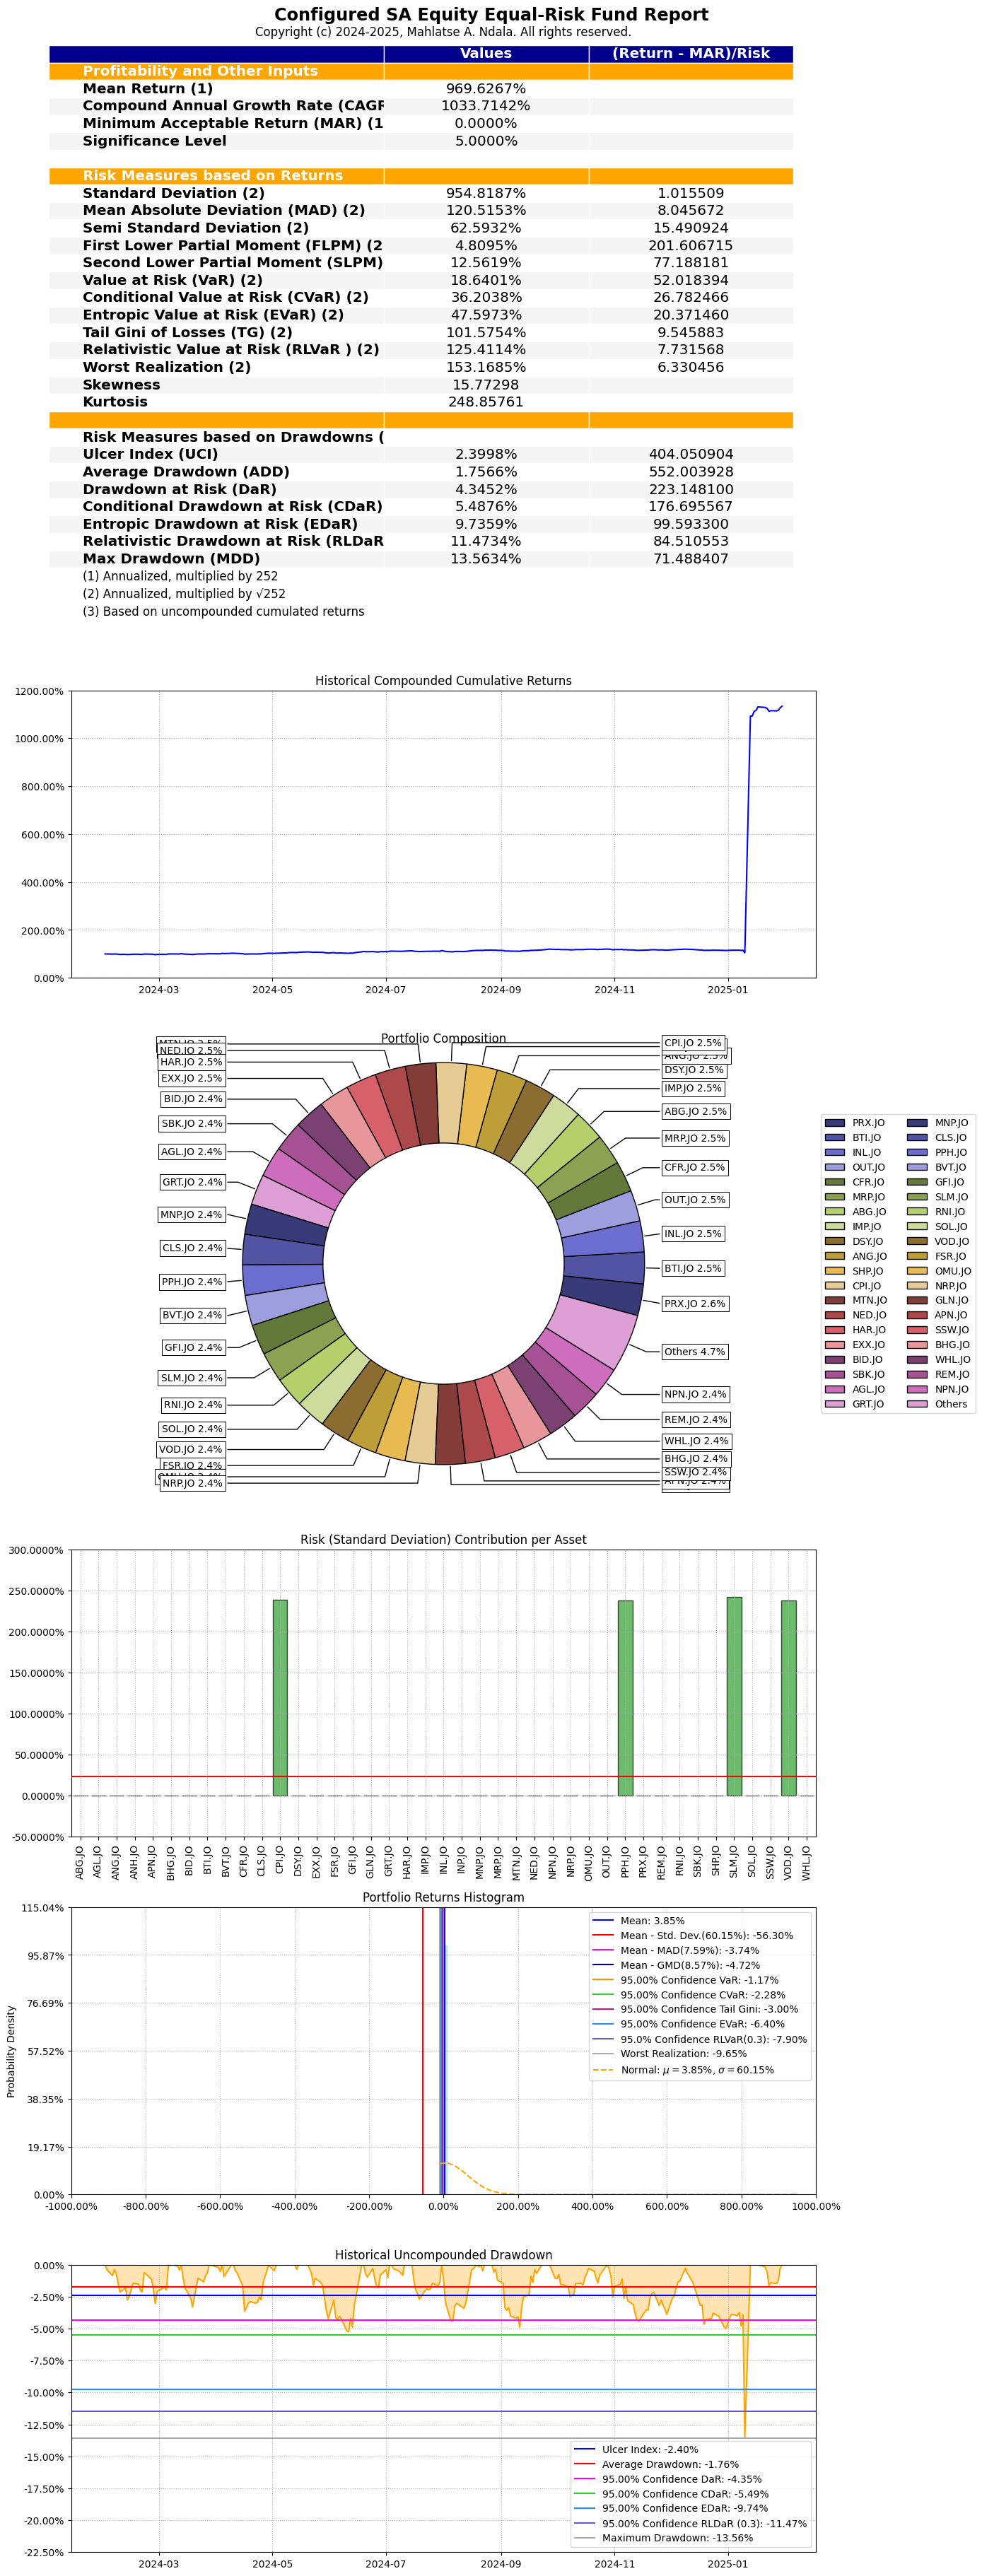

In [34]:
import matplotlib.pyplot as plt

ax = rp.jupyter_report(returns, w, rm=rm, t_factor = 252, days_per_year = 365)
plt.show()

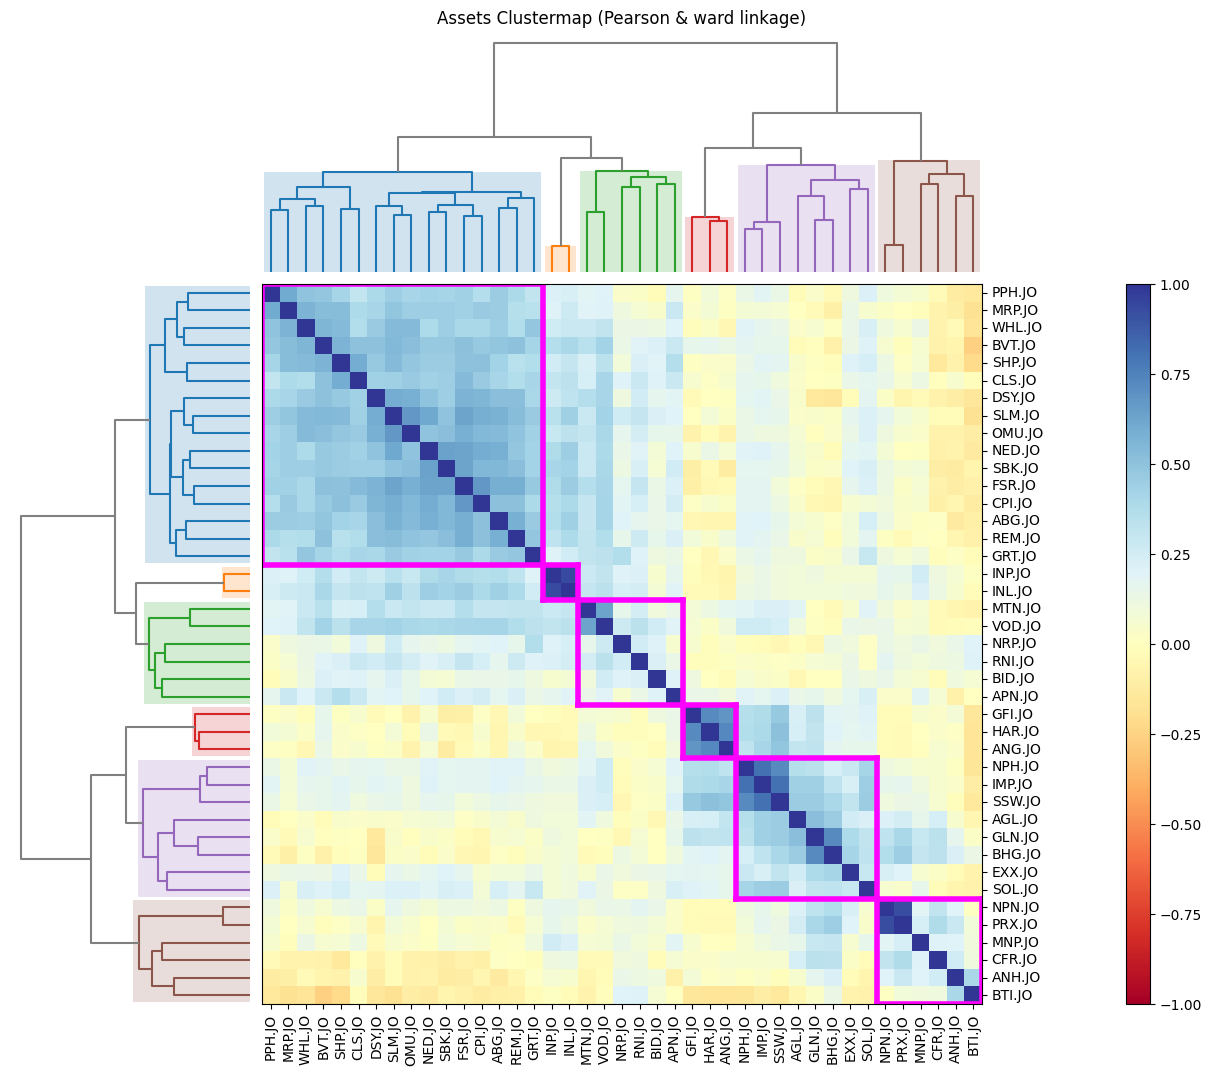

In [ ]:
ax = rp.plot_clusters(returns,
                      codependence = "pearson",
                      linkage = "ward",
                      k = None,
                      max_k = 10,
                      leaf_order = True,
                      dendrogram = True,
                      ax = None)